In [1]:
import pydot 
import os
from IPython.display import Image, display
import graphviz
from graphviz import Digraph, Graph
import numpy as np
import seaborn as sns

In [2]:
dire = r"d:\Users\burkaz\Desktop\homework\week_3"

In [3]:
txt_file = open(r"p2p-Gnutella08.txt", "r")
txt_file = txt_file.readlines()
new_lst = txt_file[4:]

In [4]:
new_lst[:10]

['0\t1\n',
 '0\t2\n',
 '0\t3\n',
 '0\t4\n',
 '0\t5\n',
 '0\t6\n',
 '0\t7\n',
 '0\t8\n',
 '0\t9\n',
 '0\t10\n']

In [5]:
fromNodeId = [int(x.split("\t")[0]) for x in new_lst]
ToNodeId = [int(x.split("\t")[1].split("\n")[0]) for x in new_lst]

In [6]:
txt_file[:10]

['# Directed graph (each unordered pair of nodes is saved once): p2p-Gnutella08.txt \n',
 '# Directed Gnutella P2P network from August 8 2002\n',
 '# Nodes: 6301 Edges: 20777\n',
 '# FromNodeId\tToNodeId\n',
 '0\t1\n',
 '0\t2\n',
 '0\t3\n',
 '0\t4\n',
 '0\t5\n',
 '0\t6\n']

In [7]:
max(fromNodeId), max(ToNodeId)

(6296, 6300)

In [8]:
len(fromNodeId), len(ToNodeId)

(20777, 20777)

In [9]:
import networkx as nx
import os
import matplotlib.pyplot as plt

In [10]:

dire = r"d:\Users\burkaz\Desktop\homework\week_3"
G = nx.Graph(name="Social Network")
for i in range(200): #max(ToNodeId)
    G.add_nodes_from([i])
for k in range(1200):#len(fromNodeId)
    G.add_edges_from([(fromNodeId[k], ToNodeId[k] )])


In [11]:
print(G.number_of_nodes())
print(G.number_of_edges())

873
1200


In [12]:
fromNodeId[:10], ToNodeId[:10]

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [13]:
degrees = G.degree
degree_values = list(dict(degrees).values())

In [15]:
max(degree_values)

19

In [508]:
counting = len(list(dict(degrees).values()))
labels_lst = []

In [509]:
for i in range(0,counting):
    dic_key = list(dict(degrees).keys())[i]
    dic_values = list(dict(degrees).values())[i]
    
    if dic_values>15:
        labels_lst.append(dic_key)
    else: 
        labels_lst.append("")


In [510]:
node_size = [x/max(degree_values)*300 for x in degree_values]
node_color = [x/max(degree_values)*1 for x in degree_values]   

In [511]:
%%time
layout = nx.fruchterman_reingold_layout(G)

Wall time: 6.91 s


Wall time: 233 ms


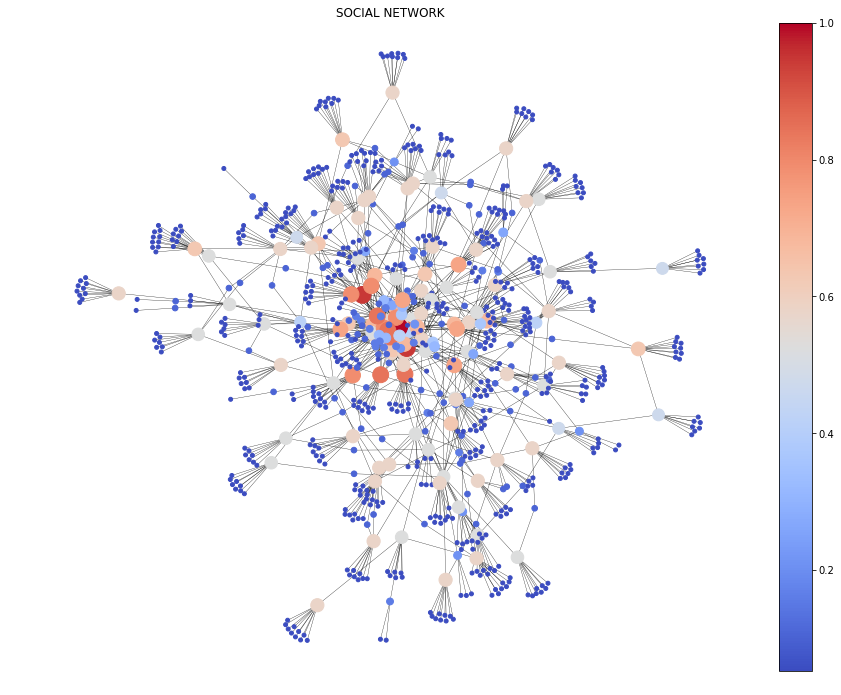

In [513]:
%%time
plt.figure(figsize=(12,9))

vmin = min(node_color)
vmax = max(node_color)
cmap = plt.cm.coolwarm

nx.draw(G, pos=layout, with_labels=False, arrows=True, node_size=node_size, width=0.3,edge_color="black",
        node_color=node_color, marker_edge_color="black", cmap=cmap, vmin=vmin, vmax=vmax)
plt.title("SOCIAL NETWORK")

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)

plt.savefig("test_graph.png")